In [881]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

from sklearn import model_selection

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import re

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
# Metrics for measuring our fit
from sklearn.metrics import mean_squared_error, accuracy_score

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [882]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [883]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [884]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [885]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [886]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [887]:
#missing data in training set
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [888]:
#missing data in test set
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [889]:
combined = pd.concat([train, test], ignore_index=True)

##We discussed the below command in detail the data exploration notebook
print('Missing values Percentage: \n\n', round (combined.isnull().sum().sort_values(ascending=False)/len(combined)*100,1))

Missing values Percentage: 

 Cabin          77.5
Survived       31.9
Age            20.1
Embarked        0.2
Fare            0.1
PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
dtype: float64


In [890]:
display(combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master'))])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1135,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
1230,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
1235,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


There are 8 children and all are pClass=3 and male. If we had taken the simple approach of applying the mean() for every missing entry, we would have entered their ages as 30. But we know that they are Children. So they should be < 14 for sure and definitely not 30.

In [891]:
print(train[train.Name.str.contains('Master')]['Age'].mean())

4.574166666666667


So 5 is a good average Age for these 8 boys which is a vast difference from the 30 we earlier wanted to go with.

Before we update the values for these 8 kids, let us do a quick sanity check. We know that these kids should ideally have non-zero Parch i.e. these small kids should not be travelling alone but travelling with at least 1 parent!

In [892]:
display((combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master')) & (combined.Parch==0)]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1230,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C


In [893]:
##So there are cases (just 1) where a child is travelling without either parents..
##Probably (travelling with nanny or relatives. We will just assume that the Child
##is little senior in age and cannot be 5. We will assign the max value of Master
##which is around 14 for such cases.
test.loc[test.PassengerId==1231,'Age']=14

The remaining ages will be filled up as a part of the common code. For that we need to extract the 'Title' from the name.

In [894]:
train['Title'], test['Title'] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [train, test]]

The code can be read from right to left and is a 'list comprehension' and is executed as follows:

'for each dataframe df in list of dataframes'
'extract title'
'store result in a new column in the 2 dataframes'

'store result in a new column in the 2 dataframes': Here the first list is stored as an additional column in the first dataframe - train_data and the second list is stored as an additional column in the second dataframe test_data.

In [895]:
train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [896]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [897]:
train['Title'], test['Title'] = [df.Title.map(TitleDict) for df in [train, test]]

##Let us now reprint the groups
train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [898]:
display(train[train.Title.isnull()])
display(test[test.Title.isnull()])

##There is Dona which is royalty which is not covered in test_data. Update the same
test.at[414,'Title'] = 'Royalty'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


Now all titles are in shape. We can groupby Pclass, Sex, Royalty and find the mean and then plug in all the missing Age values.



Let us say you spend hours writing some nifty code to arrive at an age of 31 instead of 38 for a missing age passenger (and it turns out her actual age happens to be 31). Will it make a lot of difference to her survival? The answer is NO. There are other factors which are far more important. HOWEVER the fact whether the person is a child or an adult or a senior citizen DOES play a critical role in survival. So long as one can categorize the missing ages as belonging to one of this group it is fine! In particular, we should be spending a lot more time worrying about whether the person in question (with the missing age) was a child or not? This makes a lot of difference to the survival chance.

All unmarried females across all ages had the 'Miss' Title. So here is a simple way to identify such folks and impute their missing ages. I haven't seen it being used in any kernel so far (at least the ones I have gone thru' though). We can identify the such cases by checking the Parch flag. If Parch flag is >0 then they are most likely female children.

In [899]:
print ("Avg age of 'Miss' Title", round(train[train.Title=="Miss"]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling without Parents", round(train[(train.Title=="Miss") & (train.Parch==0)]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling with Parents", round(train[(train.Title=="Miss") & (train.Parch!=0)]['Age'].mean()), '\n')

Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 28
Avg age of 'Miss' Title travelling with Parents 12 



let us quickly tackle the other missing values

In [900]:
##Let us turn our attention to the missing fare
display(combined[combined.Fare.isnull()])

##Let us get fare per person
for df in [train, test, combined]:
    df['PeopleInTicket']=df['Ticket'].map(combined['Ticket'].value_counts())
    df['FarePerPerson']=df['Fare']/df['PeopleInTicket']

##Just take the mean fare for the PORT S and the Pclass & fill it. Remember to consider FarePerPerson and not Fare
print('Mean fare for this category: ', train[(train.Embarked=='S') & (train.Pclass==3)]['FarePerPerson'].mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Mean fare for this category:  7.382647773383368


The mean fare is almost DOUBLE the mean fareperperson for Port S Pclass3. This is because fare is actually the total fare for a group. These kind of small 'additional' efforts in determining the missing data will go a long way in helping with better results. However for the Titanic dataset, there is only one missing fare and in general fare does not play a very big role in survival (Pclass already accounts for that relationship). So this is more of an academic exercise.

In [901]:
test.loc[test.Fare.isnull(), ['Fare','FarePerPerson']] = round(train[(train.Embarked=='S') & (train.Pclass==3) & (train.PeopleInTicket==1)]['Fare'].mean(),1)

You may be interested to know that the fare changed from 7.8 to 8.1 as a result of us taking the mean of solo travellers. So indeed there was some discount for group travellers..Or maybe the fact was that children were charged less. Whatever be the reason, this gives a better imputation.

Let us now tackle the 2 Embarked missing rows



In [902]:
display(combined[combined.Embarked.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2,40.0


In [903]:
##Fare is 40 per person (80 for 2 people) for Pclass 1 for 2 adults. Where could they have Embarked from?

##Let us groupby Embarked and check some statistics
train[(train.Pclass==1)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,39.179223,104.718529,85
Q,30.000000,90.000000,2
S,30.211849,70.364862,127


In [904]:
##Let us check same data for groups of 2 adults
train[(train.Pclass==1) & (train.PeopleInTicket==2) & (train.Age>18)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,35.073648,70.147296,23
S,31.702411,63.404822,32


In [905]:
#for women travellers in PeopleInTicket = 2 for Pclass = 1
print(train[(~train.Cabin.isnull()) & (train.Pclass==1) & (train.PeopleInTicket==2) & (train.Sex=="female") & (train.Age>18)].groupby('Embarked').agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'}))

          FarePerPerson      Fare  PassengerId
Embarked                                      
C              36.19730  72.39460           10
S              31.61042  63.22084           10


In [906]:
train.Embarked.fillna('C', inplace=True)

Let us fill the remaining missing Ages with the mean values. This is deduced from the mean of similar passengers based on [Sex, Pclass, Title]. This is a 1 line code but there is one small complication. As discussed earlier, the mean Age for the Title 'Miss' fluctuates wildly based on whether she has Parch>1 or not (basically whether she is has a parent or not). We need to take care of this situation first. Let us add a new Title titled 'FemaleChild'. Before that let us take the mean ages once again as a reference.

In [907]:
print(train.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))

                       count       mean  median
Pclass Sex    Title                            
1      female Miss        47  29.744681    30.0
              Mrs         35  40.400000    40.0
              Royalty      3  43.333333    48.0
       male   Master       3   5.306667     4.0
              Mr          87  41.580460    40.0
              Officer      5  56.600000    56.0
              Royalty      6  42.166667    42.0
2      female Miss        32  22.390625    24.0
              Mrs         42  33.547619    31.5
       male   Master       9   2.258889     1.0
              Mr          82  32.768293    31.0
              Royalty      8  42.000000    46.5
3      female Miss        69  16.123188    18.0
              Mrs         33  33.515152    31.0
       male   Master      24   5.350833     4.0
              Mr         229  28.724891    26.0


In [908]:
combined = pd.concat([train, test], ignore_index=True)

In [909]:
for df in [train, test, combined]:
    combined.loc[(combined.Title=='Miss') & (combined.Parch!=0) & (combined.PeopleInTicket>1), 'Title']="FemaleChild"

display(combined[(combined.Age.isnull()) & (combined.Title=='FemaleChild')])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PeopleInTicket,FarePerPerson
128,129,1.0,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,FemaleChild,3,7.452767
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,FemaleChild,11,6.322727
229,230,0.0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,FemaleChild,5,5.093340
409,410,0.0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,FemaleChild,5,5.093340
485,486,0.0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,FemaleChild,5,5.093340
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,FemaleChild,11,6.322727
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,FemaleChild,11,6.322727
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,FemaleChild,4,5.862500
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,FemaleChild,11,6.322727


I added a condition that 'femalechild' should be non-solo traveller. Observe that we have identified 9 possible 'ADDITIONAL' minors with the 'femalechild' title. Without this, we would have imputed values of 30, 22 & 16 to the 'Miss' title across Pclass 1,2,3 respectively. Thus we would NOT have added any minor as part of the missing Age identification.

This approach ideally should help increase the score of the model by a little bit (not much..maybe a decimal of a percentage) but in a serious competition this could make all the difference between a 10th position and 1st. In Pclass 3 'age group' is not that strong a factor for survival so this may not matter much..but if these missing rows were from Pclass 1 or Pclass 2, the score would have gone up significantly because being a child mattered a lot in those classes

In [910]:
grp = train.groupby(['Pclass','Sex','Title'])['Age'].mean()
print(grp)

Pclass  Sex     Title  
1       female  Miss       29.744681
                Mrs        40.400000
                Royalty    43.333333
        male    Master      5.306667
                Mr         41.580460
                Officer    56.600000
                Royalty    42.166667
2       female  Miss       22.390625
                Mrs        33.547619
        male    Master      2.258889
                Mr         32.768293
                Royalty    42.000000
3       female  Miss       16.123188
                Mrs        33.515152
        male    Master      5.350833
                Mr         28.724891
Name: Age, dtype: float64


In [911]:
## let us convert this 'series' object into a 'dataframe'
##We use the re-index feature. This is an important tool
grp = train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

print('\n', 'We converted the series object to: ', type(grp))


 We converted the series object to:  <class 'pandas.core.frame.DataFrame'>


In [912]:
##Define a function called fill_age. This will lookup the combination
##passed to it using above lookup table and return the value of the age associated
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
##Here 'x' is the row containing the missing age. We look up the row's Pclass
##Sex and Title against the lookup table as shown previously and return the Age
##Now we have to call this fill_age function for every missing row for test, train

train['Age'], test['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [train, test]]
##This line is explained in the next cell

##End by combining the test and training data
combined = pd.concat([train, test], ignore_index=True)

In [913]:
combined.isnull().sum().sort_values(ascending = False)

Cabin             1014
Survived           418
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
PeopleInTicket       0
FarePerPerson        0
dtype: int64

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

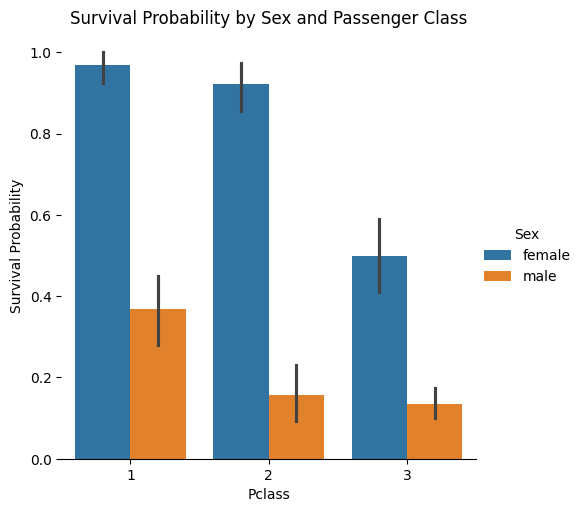

In [914]:
# Survival by gender and passenger class


g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [915]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.558824
1,Q,0.389610
2,S,0.336957


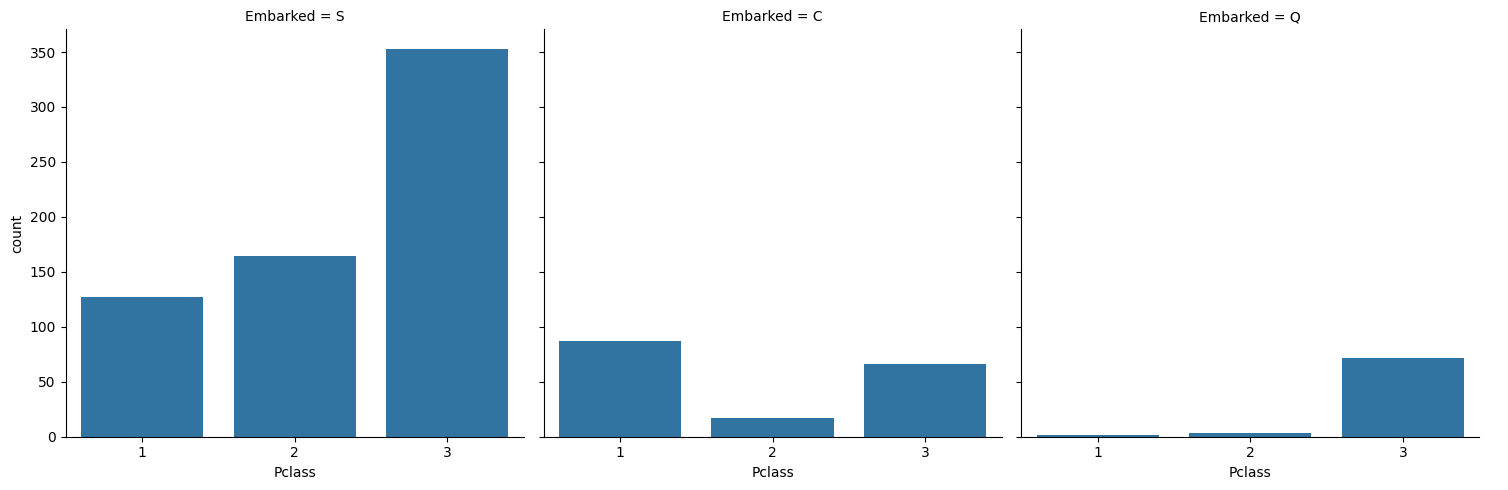

In [916]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')


most first class passengers boarded S and C, since they have a high chance of survival the data points towards more people survivng boarding from C

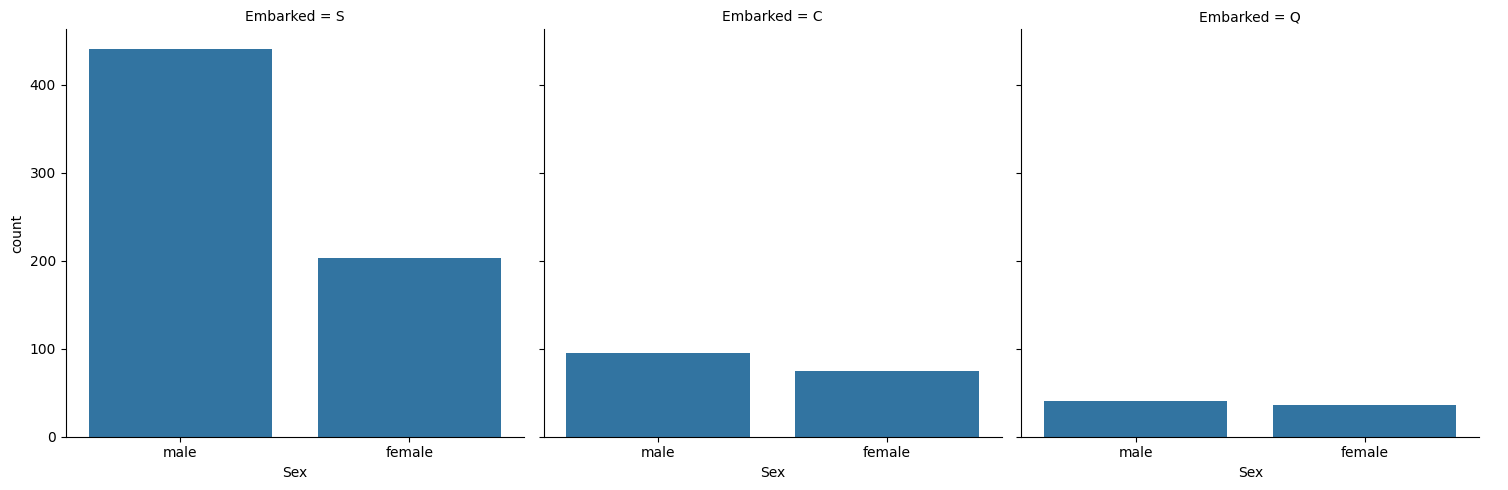

In [917]:
sns.catplot(x='Sex', col = 'Embarked', data = train, kind = 'count')



men had a high rate of survival vs women if they boarded from C even when the count is not v different from females

women had a high rate of survival vs men if they boarded from S even when they are 0.5x of men in number

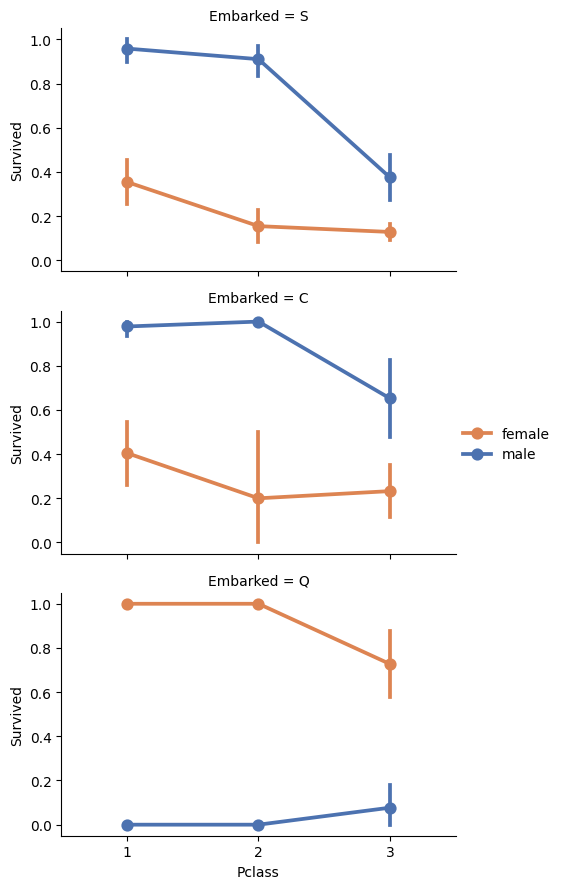

In [918]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [919]:
combined = combined.drop('Cabin', axis = 1)

In [920]:
combined.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

<Axes: xlabel='FarePerPerson'>

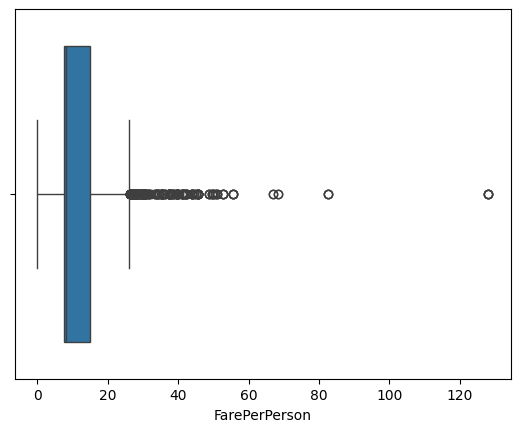

In [921]:
sns.boxplot(x="FarePerPerson", data=combined)


from the boxplot above, the black circular points which are indicated by an arrow show the presence of extreme values in the variable.

<Axes: >

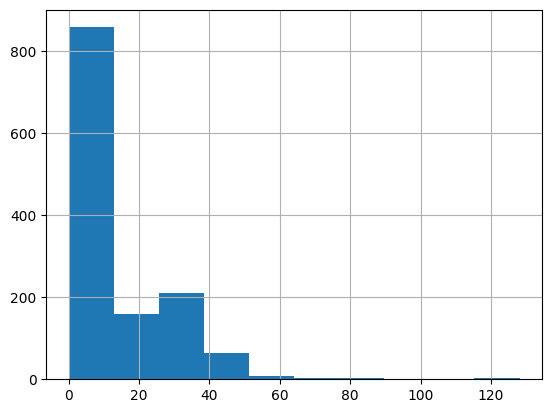

In [922]:
combined['FarePerPerson'].hist()


from the histogram above, the histogram appears to be distributed to the left, this also indicates the presence of outliers.

## Skewness

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [923]:
print('skewness value of Age: ',combined['Age'].skew())
print('skewness value of Fare: ',combined['FarePerPerson'].skew())

skewness value of Age:  0.42830003948480033
skewness value of Fare:  3.044707750121138


from the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

## Interquartile Range(IQR)


The interquartile range is a measure of statistical dispersion and is calculated as the difference between 75th and 25th percentiles. the Quartiles divide the data set into four equal parts. The values that separate parts are called the first, second, and third quartiles.

In [924]:
Q1=combined['FarePerPerson'].quantile(0.25)
Q3=combined['FarePerPerson'].quantile(0.75)
IQR=Q3-Q1

In [925]:
print(IQR)

7.45


In [926]:
whisker_width = 1.5
Fare_outliers = combined[(combined['FarePerPerson'] < Q1 - whisker_width*IQR) | (combined['FarePerPerson'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,PeopleInTicket,FarePerPerson
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2,35.641650
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2,26.550000
11,1.0,1,female,58.0,0,0,26.5500,S,Miss,1,26.550000
23,1.0,1,male,28.0,0,0,35.5000,S,Mr,1,35.500000
27,0.0,1,male,19.0,3,2,263.0000,S,Mr,6,43.833333


## Outliers Treatment

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [927]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
combined['FarePerPerson']=np.where(combined['FarePerPerson']>upper_whisker,upper_whisker,np.where(df['FarePerPerson']<lower_whisker,lower_whisker,combined['FarePerPerson']))

<Axes: xlabel='FarePerPerson'>

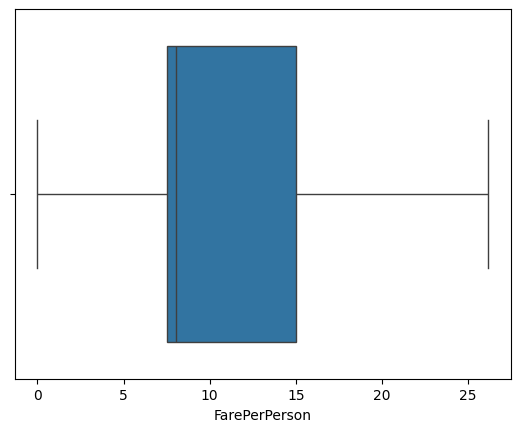

In [928]:
sns.boxplot(x="FarePerPerson", data=combined)


<Axes: >

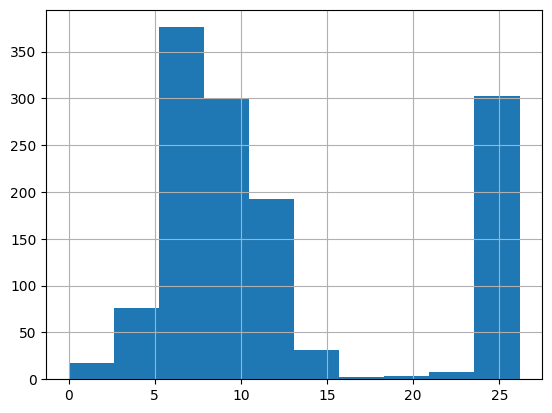

In [929]:
combined['FarePerPerson'].hist()


In [930]:
print('skewness value of Age: ',combined['Age'].skew())
print('skewness value of Fare: ',combined['FarePerPerson'].skew())

skewness value of Age:  0.42830003948480033
skewness value of Fare:  0.9319983504677439


## Further Outlier Treatment

Given the situation where many values are very close to zero and you cannot modify them, you can still apply transformations to make the data more suitable for analysis. One alternative to the Box-Cox transformation in such cases is the Yeo-Johnson transformation, which can handle zero and negative values.

In [931]:
# Add a small constant to handle zero values
combined['FarePerPerson'] = combined['FarePerPerson'] + 1e-6

In [932]:
combined['fare_transformed'], fitted_lambda = stats.yeojohnson(combined['FarePerPerson'])

In [933]:
print('skewness value of Fare: ',combined['fare_transformed'].skew())

skewness value of Fare:  0.031326041430098525


<Axes: >

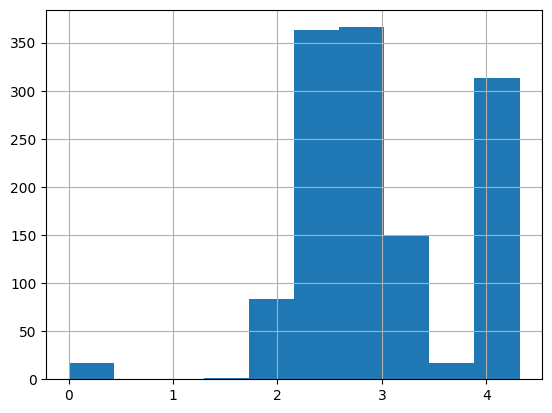

In [934]:
combined['fare_transformed'].hist()

Based on the visual appearance of this histogram, it seems that the skewness issue has been addressed reasonably well, likely through a combination of transformations and other techniques.

In [935]:
combined.drop('FarePerPerson', axis=1, inplace=True)

In [936]:
combined.drop('Fare', axis=1, inplace=True)

In [937]:
combined.drop('PeopleInTicket', axis=1, inplace=True)

In [938]:
combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,fare_transformed
0,0.0,3,male,22.0,1,0,S,Mr,2.498645
1,1.0,1,female,38.0,1,0,C,Mrs,4.318864
2,1.0,3,female,26.0,0,0,S,Miss,2.608589
3,1.0,1,female,35.0,1,0,S,Mrs,4.318864
4,0.0,3,male,35.0,0,0,S,Mr,2.628174


In [939]:
combined[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.701087
0,Master,0.575000
4,Officer,0.400000
5,Royalty,0.333333
2,Mr,0.156673


In [940]:
# Calculate family size from SibSp and Parch

combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [941]:
# Create IsAlone feature

combined['IsAlone'] = 0
combined.loc[combined['FamilySize'] == 1, 'IsAlone'] = 1

In [942]:
# Mean of survival by IsAlone

combined[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [943]:
# Drop SibSp, Parch and FamilySize features from combine dataframe
combined = combined.drop(['SibSp'], axis = 1)
combined = combined.drop(['Parch'], axis = 1)
combined = combined.drop('FamilySize', axis = 1)


combined.head()

,Survived,Pclass,Sex,Age,Embarked,Title,fare_transformed,IsAlone
0,0.0,3,male,22.0,S,Mr,2.498645,0
1,1.0,1,female,38.0,C,Mrs,4.318864,0
2,1.0,3,female,26.0,S,Miss,2.608589,1
3,1.0,1,female,35.0,S,Mrs,4.318864,0
4,0.0,3,male,35.0,S,Mr,2.628174,1


In [944]:
combined = pd.get_dummies(combined, columns = ['Pclass'])

In [945]:
combined['FareBand'] = pd.cut(combined['fare_transformed'], 4)
combined[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00432, 1.08]",0.066667
1,"(1.08, 2.159]",0.327869
2,"(2.159, 3.239]",0.284884
3,"(3.239, 4.319]",0.581940


In [946]:
combined.head()

,Survived,Sex,Age,Embarked,Title,fare_transformed,IsAlone,Pclass_1,Pclass_2,Pclass_3,FareBand
0,0.0,male,22.0,S,Mr,2.498645,0,False,False,True,"(2.159, 3.239]"
1,1.0,female,38.0,C,Mrs,4.318864,0,True,False,False,"(3.239, 4.319]"
2,1.0,female,26.0,S,Miss,2.608589,1,False,False,True,"(2.159, 3.239]"
3,1.0,female,35.0,S,Mrs,4.318864,0,True,False,False,"(3.239, 4.319]"
4,0.0,male,35.0,S,Mr,2.628174,1,False,False,True,"(2.159, 3.239]"


In [947]:
# Create ordinal labels for FareBand
fare_band_labels = combined['FareBand'].unique().sort_values()
fare_band_labels_mapping = {label: idx for idx, label in enumerate(fare_band_labels)}

# Map ordinal labels to FareBand column
combined['FareBand_Ordinal'] = combined['FareBand'].map(fare_band_labels_mapping)


In [948]:
combined.head()

,Survived,Sex,Age,Embarked,Title,fare_transformed,IsAlone,Pclass_1,Pclass_2,Pclass_3,FareBand,FareBand_Ordinal
0,0.0,male,22.0,S,Mr,2.498645,0,False,False,True,"(2.159, 3.239]",2
1,1.0,female,38.0,C,Mrs,4.318864,0,True,False,False,"(3.239, 4.319]",3
2,1.0,female,26.0,S,Miss,2.608589,1,False,False,True,"(2.159, 3.239]",2
3,1.0,female,35.0,S,Mrs,4.318864,0,True,False,False,"(3.239, 4.319]",3
4,0.0,male,35.0,S,Mr,2.628174,1,False,False,True,"(2.159, 3.239]",2


In [949]:
combined[['FareBand_Ordinal', 'Survived']].groupby(['FareBand_Ordinal'], as_index=False).mean().sort_values(by = 'FareBand_Ordinal')

,FareBand_Ordinal,Survived
0,0,0.066667
1,1,0.327869
2,2,0.284884
3,3,0.581940


In [950]:
combined = combined.drop(['FareBand'], axis = 1)


In [951]:
combined['Pclass_1'] = combined['Pclass_1'].map({True: 1, False: 0})
combined['Pclass_2'] = combined['Pclass_2'].map({True: 1, False: 0})
combined['Pclass_3'] = combined['Pclass_3'].map({True: 1, False: 0})

In [952]:
combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})

In [953]:
combined = pd.get_dummies(combined, columns = ['FareBand_Ordinal'])

In [954]:
combined['FareBand_Ordinal_0'] = combined['FareBand_Ordinal_0'].map({True: 1, False: 0})
combined['FareBand_Ordinal_1'] = combined['FareBand_Ordinal_1'].map({True: 1, False: 0})
combined['FareBand_Ordinal_2'] = combined['FareBand_Ordinal_2'].map({True: 1, False: 0})
combined['FareBand_Ordinal_3'] = combined['FareBand_Ordinal_3'].map({True: 1, False: 0})

In [955]:
combined = pd.get_dummies(combined, columns = ['Title'])

In [956]:
combined['Title_Master'] = combined['Title_Master'].map({True: 1, False: 0})
combined['Title_Miss'] = combined['Title_Miss'].map({True: 1, False: 0})
combined['Title_Mr'] = combined['Title_Mr'].map({True: 1, False: 0})
combined['Title_Mrs'] = combined['Title_Mrs'].map({True: 1, False: 0})
combined['Title_Officer'] = combined['Title_Officer'].map({True: 1, False: 0})
combined['Title_Royalty'] = combined['Title_Royalty'].map({True: 1, False: 0})


In [957]:
combined = pd.get_dummies(combined, columns = ['Embarked'])

In [958]:
combined['Embarked_C'] = combined['Embarked_C'].map({True: 1, False: 0})
combined['Embarked_Q'] = combined['Embarked_Q'].map({True: 1, False: 0})
combined['Embarked_S'] = combined['Embarked_S'].map({True: 1, False: 0})

In [959]:
combined['Age'] = combined['Age'].astype(int)

In [960]:
combined.head()

,Survived,Sex,Age,fare_transformed,IsAlone,Pclass_1,Pclass_2,Pclass_3,FareBand_Ordinal_0,FareBand_Ordinal_1,...,FareBand_Ordinal_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22,2.498645,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.0,0,38,4.318864,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1.0,0,26,2.608589,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,0,35,4.318864,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.0,1,35,2.628174,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [961]:
train = combined[:len(train)]
test = combined[len(train):]

In [962]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Sex,Age,fare_transformed,IsAlone,Pclass_1,Pclass_2,Pclass_3,FareBand_Ordinal_0,FareBand_Ordinal_1,...,FareBand_Ordinal_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22,2.498645,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,38,4.318864,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,0,26,2.608589,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35,4.318864,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,35,2.628174,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [963]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,Sex,Age,fare_transformed,IsAlone,Pclass_1,Pclass_2,Pclass_3,FareBand_Ordinal_0,FareBand_Ordinal_1,FareBand_Ordinal_2,FareBand_Ordinal_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
891,1,34,2.593422,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
892,0,47,2.455992,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
893,1,62,2.865677,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
894,1,27,2.720961,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
895,0,22,2.300826,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [964]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 20)
Y_train shape:  (891,)
X_test shape:  (418, 20)


In [965]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.49

In [966]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

73.29

In [967]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.08

In [968]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


75.98

In [969]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

80.58

In [970]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

67.23

In [971]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

83.16

In [972]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.08

In [973]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.08

In [974]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,97.08
1,Decision Tree,97.08
2,KNN,86.08
3,Linear SVC,83.16
4,Logistic Regression,82.49
5,Perceptron,80.58
6,Naive Bayes,75.98
7,Support Vector Machines,73.29
8,Stochastic Gradient Decent,67.23


In [987]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.08

In [988]:
Y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [983]:
len(Y_pred)

418

In [984]:
submit = pd.DataFrame({'PassengerId': test.index + 1, 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [985]:
# Create and save csv file

submit.to_csv("submit.csv", index = False)

In [986]:
from google.colab import files

# Download the CSV file to your local machine
files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>